In [23]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
# mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# lets change the quality column with our new values based on the mapping dictionary
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [5]:
df['quality'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

## Splitting the data

In [6]:
df.shape

(1599, 12)

In [8]:
# shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# lets select the top 1000 for training
df_train = df.head(1000)

# and the bottom 599 for testing
df_test = df.tail(599)

## Train a Decision Tree

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=7)

# features of the model
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

# train the model
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

## Generate Predictions

In [18]:
# predict over the train set
train_predictions = clf.predict(df_train[cols])

# predict over the test set
test_predictions = clf.predict(df_test[cols])

# calculate accuracy on the train set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculate accuracy on the test set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)


print(f'train_accuracy: {train_accuracy}')
print(f'test_accuracy: {test_accuracy}')

train_accuracy: 0.774
test_accuracy: 0.5475792988313857


## Training with different max_depths

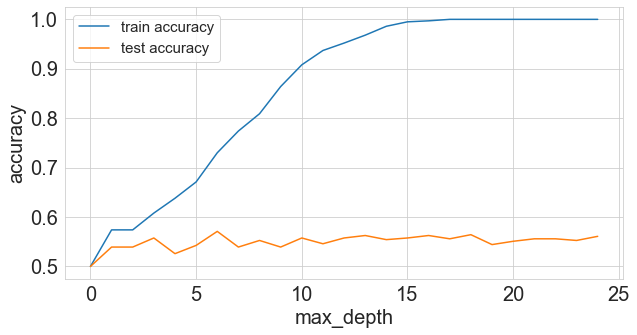

In [27]:
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterata over a few depth values
for depth in range(1, 25):
    # init model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # fit the model
    clf.fit(df_train[cols], df_train.quality)
    
    # training and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # training and test acurracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# create the plots
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

Text(0, 0.5, 'count')

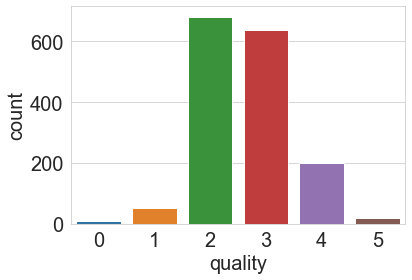

In [30]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

## Stratified k-fold for a regression dataset

In [31]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

In [43]:
def create_folds(data):
    # create a column called kfold and filled it whit -1
    data["kfold"] = -1
    
    # next we are gonna shuffle the rows
    data = data.sample(frac=1).reset_index(drop=True)
    
    # calculate the number of bins by Sturge's rule
    num_bins = np.floor(1 + np.log2(len(data))).astype(int)

    # bin targets
    data.loc[:, "bins"] = pd.cut(data['target'], bins=num_bins, labels=False)
    
    # init stratified kfold
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f
    
    data = data.drop("bins", axis=1)
    return data


if __name__ == "__main__":
    # we create a sample dataset with 15000 samples and 100 features and 1 target
    X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)
    
    # convert to a dataframe
    df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
    df.loc[:, "target"] = y
    
    # create folds
    df = create_folds(df)

/Users/santiago/opt/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
